In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
from matplotlib import rc

labelsize = 6
linewidth = 0.6
rc('lines', linewidth=linewidth)
rc('axes', labelsize=labelsize, linewidth=linewidth)
rc('xtick', labelsize=labelsize)
rc('ytick', labelsize=labelsize)
rc('xtick.major', width=linewidth)
rc('ytick.major', width=linewidth)
rc('xtick.minor', width=linewidth-0.2)
rc('ytick.minor', width=linewidth-0.2)
rc('patch', linewidth=linewidth)

In [3]:
cell_tidy_data = pd.read_msgpack(
    '/home/hanliu/project/mouse_rostral_brain/study/ClusteringSummary/Summary/TotalClusteringResults.msg'
)
cell_group = pd.read_csv('/gale/ddn/cemba/CEMBA/wtian/workspace/spatial_methyl/dg/bulk/GROUP_TABLE.csv',
                         index_col=0)
cell_group_assign = cell_group[cell_group['axis-mch'].isin(['low', 'midlow', 'midhigh', 'high'])]['axis-mch']
cell_tidy_data = cell_tidy_data.reindex(cell_group_assign.index)
cell_tidy_data['Group'] = cell_group_assign

region_palette = pd.read_csv('/home/hanliu/project/mouse_rostral_brain/metadata/palette/dissection_region.palette.csv',
                                header=None, index_col=0, squeeze=True).to_dict()


In [4]:
dmr_table = pd.read_csv(
    '/home/hanliu/project/mouse_rostral_brain/study/DGDMRCorr/axis-mch_rms_results_collapsed_passfilter_annotated.csv',
    index_col=0
)

In [5]:
increasing = dmr_table[dmr_table['trend'] == 'increasing']
decreasing = dmr_table[dmr_table['trend'] == 'decreasing']
increasing.shape, decreasing.shape
# 7 : 4

((139387, 41), (80111, 41))

(<Figure size 288x72 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f219c8d9668>)

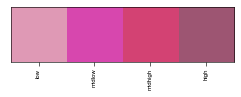

In [6]:
group_palette = {'low': '#df99b5', 
 'midlow': '#d747ae', 
 'midhigh': '#d34273', 
 'high': '#9d5572'}

from ALLCools.plot.color import palplot
palplot(group_palette)

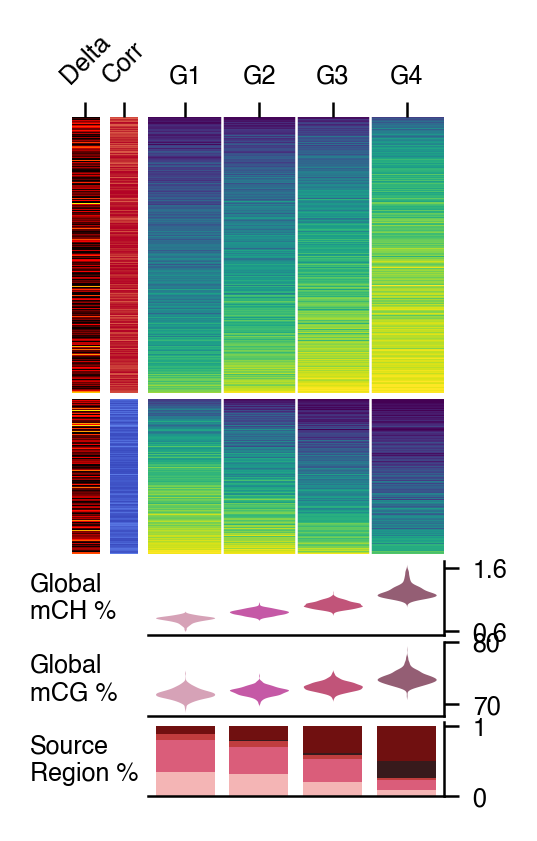

In [20]:
mcg_range = (0, 1)
corr_norm = (-1, 1)
delta_norm = (0.3, .9)

fig = plt.figure(figsize=(1.6, 3), dpi=300)

# layout
gs = fig.add_gridspec(17, 10, wspace=0.4, hspace=0.2)
ax_inc_delta = fig.add_subplot(gs[0:7, 0])
ax_inc_corr = fig.add_subplot(gs[0:7, 1])
ax_inc_mcg = fig.add_subplot(gs[0:7, 2:10])

ax_dec_delta = fig.add_subplot(gs[7:11, 0])
ax_dec_corr = fig.add_subplot(gs[7:11, 1])
ax_dec_mcg = fig.add_subplot(gs[7:11, 2:10])

ax_global_mch = fig.add_subplot(gs[11:13, 2:10])
ax_global_mcg = fig.add_subplot(gs[13:15, 2:10])
ax_global_region = fig.add_subplot(gs[15:17, 2:10])

# plot increasing DMR
ax = ax_inc_mcg
data = increasing[['low', 'midlow', 'midhigh', 'high']].copy()
delta = data.max(axis=1) - data.min(axis=1)
row_order = data.mean(axis=1).sort_values().index
data = data.loc[row_order].copy()

ax.imshow(data.values, aspect='auto',
          vmin=mcg_range[0], vmax=mcg_range[1], cmap='viridis')
ax.set(yticks=[], xticks=[0, 1, 2, 3], xticklabels=['G1', 'G2', 'G3', 'G4'])
[ax.axvline(x, linewidth=linewidth, c='w') for x in [0.5, 1.5, 2.5]]
ax.xaxis.tick_top()

ax = ax_inc_corr
data = increasing.loc[row_order, ['rho']].values
ax.imshow(data,
          aspect='auto',
          vmin=corr_norm[0],
          vmax=corr_norm[1],
          cmap='coolwarm')
sns.despine(left=True, bottom=True)
ax.set(xticks=[0], xticklabels=['Corr'], yticks=[])
ax.xaxis.set_tick_params(rotation=45)
ax.xaxis.tick_top()

ax = ax_inc_delta
data = delta.values[:, None]
ax.imshow(data,
          aspect='auto',
          vmin=delta_norm[0],
          vmax=delta_norm[1],
          cmap='hot')
sns.despine(left=True, bottom=True)
ax.set(xticks=[0], xticklabels=['Delta'], yticks=[])
ax.xaxis.set_tick_params(rotation=45)
ax.xaxis.tick_top()

ax = ax_dec_mcg
data = decreasing[['low', 'midlow', 'midhigh', 'high']].copy()
delta = data.max(axis=1) - data.min(axis=1)
row_order = data.mean(axis=1).sort_values().index
data = data.loc[row_order].copy()

ax.imshow(data.values, aspect='auto',
          vmin=mcg_range[0], vmax=mcg_range[1], cmap='viridis')
ax.set(yticks=[], xticks=[])
[ax.axvline(x, linewidth=linewidth, c='w') for x in [0.5, 1.5, 2.5]]
ax.xaxis.tick_top()

ax = ax_dec_corr
data = decreasing.loc[row_order, ['rho']].values
ax.imshow(data,
          aspect='auto',
          vmin=corr_norm[0],
          vmax=corr_norm[1],
          cmap='coolwarm')
sns.despine(left=True, bottom=True)
ax.set(xticks=[], yticks=[])

ax = ax_dec_delta
data = delta.values[:, None]
ax.imshow(data,
          aspect='auto',
          vmin=delta_norm[0],
          vmax=delta_norm[1],
          cmap='hot')
sns.despine(left=True, bottom=True)
ax.set(xticks=[], yticks=[])

ax = ax_global_mch
sns.violinplot(ax=ax,
               data=cell_tidy_data[(cell_tidy_data['CH_Rate'] < 0.016)
                                   & (cell_tidy_data['CH_Rate'] > 0.006)][[
                                       'Group', 'CH_Rate'
                                   ]],
               x='Group',
               y='CH_Rate',
               palette=group_palette,
               order=['low', 'midlow', 'midhigh', 'high'],
               scale='width',
               linewidth=0)

sns.despine(ax=ax, left=True, right=False)
ax.set(xticks=[],
       ylabel='',
       xlabel='',
       yticks=[0.006, 0.016],
       yticklabels=['0.6', '1.6'])
ax.yaxis.tick_right()
ax.text(-0.4, 0.5, 'Global\nmCH %', fontsize=labelsize, 
        transform=ax.transAxes, clip_on=False, 
        va='center', ha='left')

ax = ax_global_mcg
sns.violinplot(ax=ax,
               data=cell_tidy_data[['Group', 'CG_Rate']],
               x='Group',
               y='CG_Rate',
               order=['low', 'midlow', 'midhigh', 'high'],
               scale='width',
               palette=group_palette,
               linewidth=0)
sns.despine(ax=ax, left=True, right=False)
ax.set(xticks=[],
       ylabel='',
       xlabel='',
       yticks=[0.7, 0.8],
       yticklabels=['70', '80'])
ax.yaxis.tick_right()
ax.text(-0.4, 0.5, 'Global\nmCG %', fontsize=labelsize, 
        transform=ax.transAxes, clip_on=False, 
        va='center', ha='left')

ax = ax_global_region
count = cell_tidy_data.groupby('Group')['Region'].value_counts().unstack().loc[
    ['low', 'midlow', 'midhigh', 'high'], ['8J', '9J', '10F', '11E', '11F']].T
data = (count / count.sum()[None, :]).cumsum().unstack().reset_index()
data.columns = ['Group', 'Region', 'value']

sns.barplot(
    data=data,
    x='Group',
    order=['low', 'midlow', 'midhigh', 'high'],
    y='value',
    hue='Region',
    palette=region_palette,
    hue_order=['8J', '9J', '10F', '11E', '11F'][::-1],
    dodge=False,
)
sns.despine(ax=ax, left=True, right=False)
ax.legend_.set_visible(False)
ax.set(xticks=[], yticks=[0, 1], xlabel='', ylabel='')
ax.yaxis.tick_right()
ax.text(-0.4, 0.5, 'Source\nRegion %', fontsize=labelsize, 
        transform=ax.transAxes, clip_on=False, 
        va='center', ha='left')

fig.savefig('Compound.GradientDMR.pdf', bbox_inches='tight')

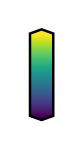

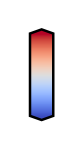

In [25]:
hue_norm = (0, 1)

from matplotlib.cm import get_cmap
from matplotlib.colors import ListedColormap, Normalize
from matplotlib.colorbar import ColorbarBase


fig, cax = plt.subplots(figsize=(0.1, 0.4), dpi=300)
orientation = 'vertical'
cmap = get_cmap('viridis')

cnorm = Normalize(vmin=hue_norm[0],
                      vmax=hue_norm[1])

colorbar = ColorbarBase(cax,
                        cmap=cmap,
                        norm=cnorm,
                        orientation=orientation,
                        extend='both')
colorbar.outline.set_linewidth(linewidth)
colorbar.set_ticks([])
colorbar.set_ticklabels([])

colorbar.outline.set_linewidth(linewidth)
fig.savefig('color_bar_viridis.pdf')

hue_norm = (0, 1)
fig, cax = plt.subplots(figsize=(0.1, 0.4), dpi=300)
orientation = 'vertical'
cmap = get_cmap('coolwarm')

cnorm = Normalize(vmin=hue_norm[0],
                      vmax=hue_norm[1])

colorbar = ColorbarBase(cax,
                        cmap=cmap,
                        norm=cnorm,
                        orientation=orientation,
                        extend='both')
colorbar.outline.set_linewidth(linewidth)
colorbar.set_ticks([])
colorbar.set_ticklabels([])

colorbar.outline.set_linewidth(linewidth)
fig.savefig('color_bar_coolwarm.pdf')
